In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\Insurance_Churn_ParticipantsData\Train.csv")

In [147]:
df['labels'].value_counts()

0    29941
1     3967
Name: labels, dtype: int64

In [148]:
df1=df[df['labels']==0]

In [149]:
df1.shape

(29941, 17)

In [150]:
df2=df[df['labels']==1].sample(df1.shape[0],replace=True)

In [151]:
df2.shape

(29941, 17)

In [152]:
df=df1.append(df2)

In [153]:
df.shape

(59882, 17)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59882 entries, 1 to 13358
Data columns (total 17 columns):
feature_0     59882 non-null float64
feature_1     59882 non-null float64
feature_2     59882 non-null float64
feature_3     59882 non-null float64
feature_4     59882 non-null float64
feature_5     59882 non-null float64
feature_6     59882 non-null float64
feature_7     59882 non-null int64
feature_8     59882 non-null int64
feature_9     59882 non-null int64
feature_10    59882 non-null int64
feature_11    59882 non-null int64
feature_12    59882 non-null int64
feature_13    59882 non-null int64
feature_14    59882 non-null int64
feature_15    59882 non-null int64
labels        59882 non-null int64
dtypes: float64(7), int64(10)
memory usage: 8.2 MB


In [155]:
df.isna().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
labels        0
dtype: int64

In [156]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.25194,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.25194,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.25194,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.25194,0,1,1,0,0,0,0,8,3,0
6,0.288529,-0.322285,-0.817845,-0.645231,-0.569351,-0.411453,-0.25194,9,1,1,0,1,0,0,5,3,0


In [157]:
discrete=[feature for feature in df if len(df[feature].unique())<25]
print('Discrete variable count {}'.format(len(discrete)))

Discrete variable count 10


In [158]:
discrete

['feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'labels']

In [159]:
cont=[feature for feature in df if len(df[feature].unique())>25]
print('continous variable count {}'.format(len(cont)))

continous variable count 7


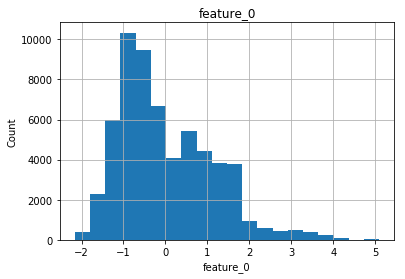

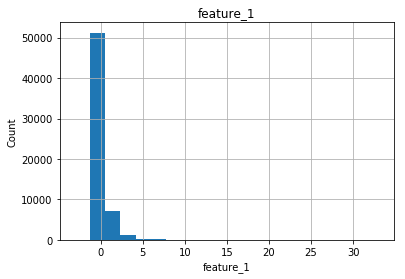

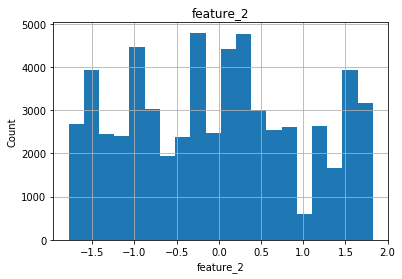

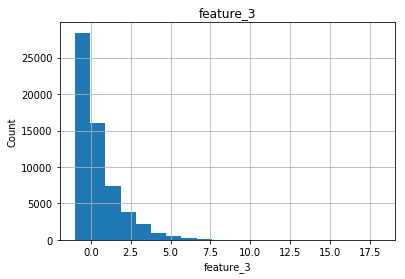

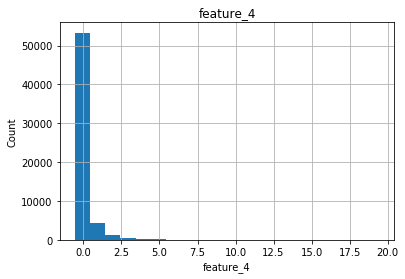

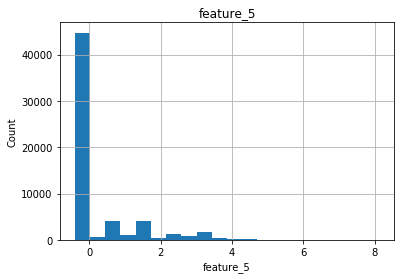

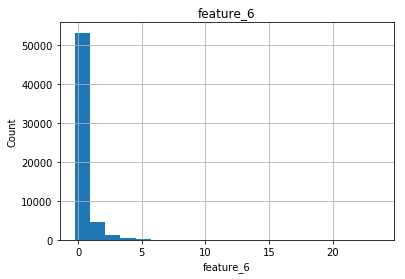

In [160]:
for feature in cont:
    data=df.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

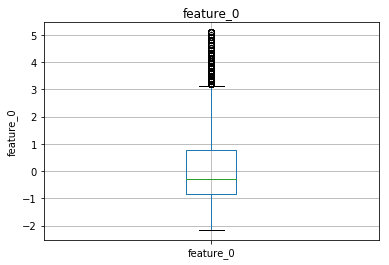

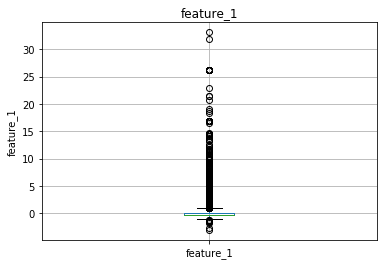

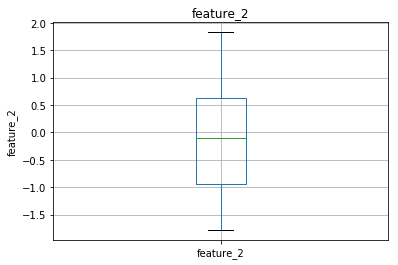

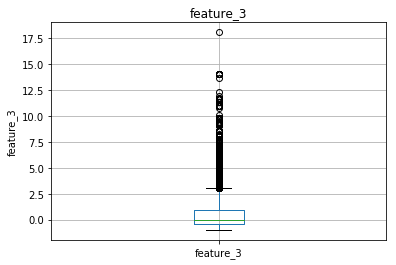

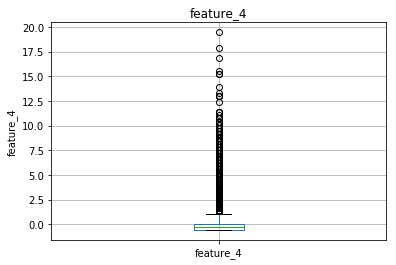

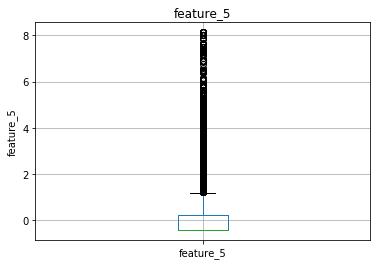

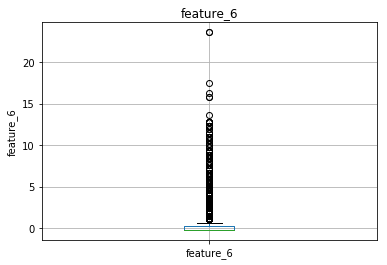

In [161]:
for feature in cont:
    data=df.copy()
    data.boxplot(feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


In [162]:
def outlier(df):
    for i in df.describe().columns:
        q1=df.describe().at['25%',i]
        q3=df.describe().at['75%',i]
        iqr=q3-q1
        utv=q3+1.5*iqr
        ltv=q1-1.5*iqr
        x=np.array(df[i])
        p=[]
        for j in x:
            if j>utv or j<ltv:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p

In [163]:
outlier(df)

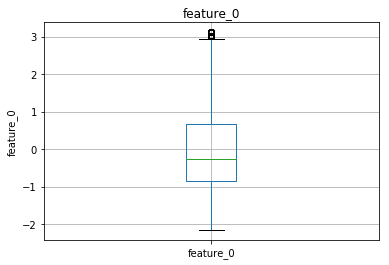

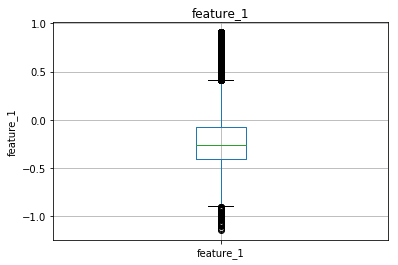

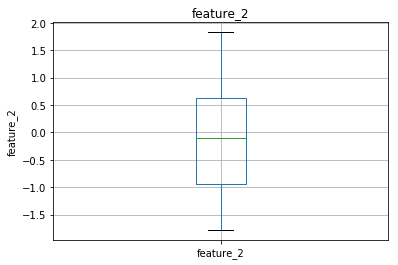

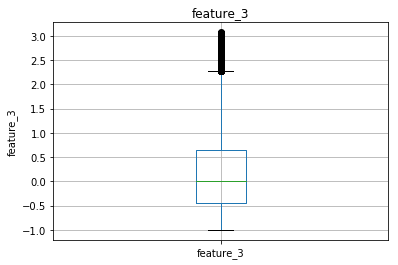

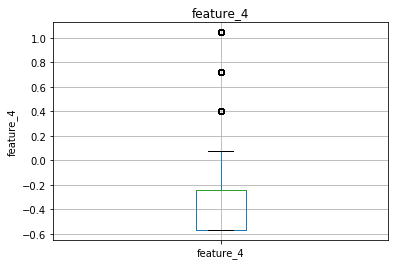

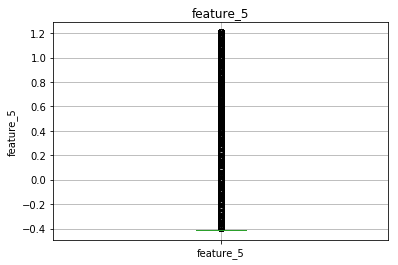

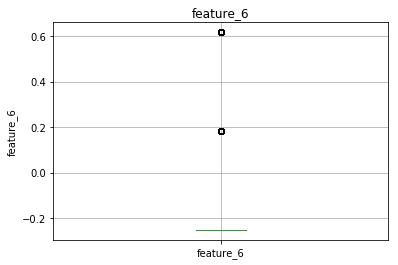

In [164]:
for feature in cont:
    data=df.copy()
    data.boxplot(feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


In [165]:
y=pd.DataFrame(df['labels'])

In [166]:
df.drop('labels',axis=1,inplace=True)

In [167]:
x=df

In [174]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
rfc=RandomForestClassifier()
rfc.fit(x,y)
rfc.predict(x)

D:\Python\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [175]:
bag=RandomForestClassifier()
bag.fit(x,y)
bag.predict(x)

D:\Python\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [169]:
from sklearn.metrics import confusion_matrix,r2_score

In [173]:
cm1=confusion_matrix(y,rfc.predict(x))
cm1

array([[29921,    20],
       [    2, 29939]], dtype=int64)

In [176]:
cm2=confusion_matrix(y,bag.predict(x))
cm2

array([[29926,    15],
       [    1, 29940]], dtype=int64)

In [177]:
score=r2_score(y,bag.predict(x))
score

0.9989312314217962

In [178]:
test_df=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\Insurance_Churn_ParticipantsData\Test.csv")

In [179]:
test_df.shape

(11303, 16)

In [180]:
test_df.isna().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
dtype: int64

In [181]:
cont=[feature for feature in test_df if len(test_df[feature].unique())>25]
print('continous variable count {}'.format(len(cont)))

continous variable count 7


In [182]:
outlier(test_df)

In [186]:
test_df_csv=pd.DataFrame(bag.predict(test_df))

In [189]:
test_df_csv.to_csv('sample submission123.csv')

In [190]:
pwd

'C:\\Users\\abhisv.CORP'